In [1]:
#from statsmodels.tsa.arima_model import 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
         # find the end of this pattern
         end_ix = i + n_steps_in
         out_end_ix = end_ix + n_steps_out
         # check if we are beyond the sequence
         if out_end_ix > len(sequence):
             break
         # gather input and output parts of the pattern
         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
         X.append(seq_x)
         y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv', index_col = 0, 
                   header=0, parse_dates=True)
agg_by_cell = data.groupby(by = ['cell_num'])

In [8]:
cell_i = agg_by_cell.get_group('486-1252')
series = cell_i.iloc[::4, :]
print(len(series))

2952


In [28]:
step_in, step_out = 2920, 12
X_data, y_data = split_sequence(series['nr_people'].values, step_in, step_out)

In [29]:
# fit model
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 24, 'n')
# define model
expected = y_data
forecasted = []
for i in range(len(X_data)):
    
    model = SARIMAX(X_data[i], order=my_order, seasonal_order=my_seasonal_order)
        
    #model = ARIMA(differenced, order=(ar,ii, ma))
    model_fit = model.fit(disp=0)

    # multi-step out-of-sample forecast
    forecast = model_fit.forecast(steps=step_out)[:24]
    forecasted.append(forecast)
    print(y_data[i])
    print(forecast)

[45. 51. 55. 51. 53. 46. 42. 38. 39. 34. 29. 26.]
[47.79619015 52.72588012 54.18551846 53.05843723 53.607034   48.76601115
 43.86736679 39.62001988 38.3329303  32.39844268 27.40053419 23.98510229]
[51. 55. 51. 53. 46. 42. 38. 39. 34. 29. 26. 23.]
[50.36356954 51.98158229 50.91494314 51.4845492  46.64767951 41.7491796
 37.50558881 36.22048026 30.2862543  25.28972036 21.87732074 18.53858401]
[55. 51. 53. 46. 42. 38. 39. 34. 29. 26. 23. 22.]
[52.51869776 51.41536841 51.97163206 47.13022181 42.23053016 37.98533716
 36.69920446 30.76503786 25.76755128 22.35380836 19.01427235 16.51410147]
[51. 53. 46. 42. 38. 39. 34. 29. 26. 23. 22. 21.]
[53.51003179 53.924483   49.03694613 44.12140551 39.86642755 38.57724637
 32.64035512 27.64021207 24.22467961 20.88486932 18.38466686 18.14538189]
[53. 46. 42. 38. 39. 34. 29. 26. 23. 22. 21. 24.]
[51.80455953 47.0680783  42.20952132 37.97259247 36.69105432 30.75511842
 25.75380708 22.33771675 18.99901738 16.49907141 16.26053099 17.38915323]
[46. 42. 38. 39.

In [30]:
forecasted = np.array(forecasted)  
error = abs(forecasted - expected)

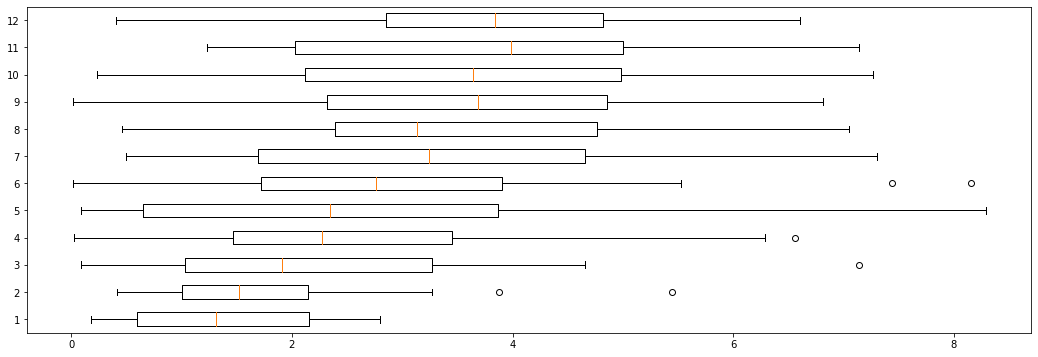

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 6))
plt.boxplot(error, vert = False)
plt.show()